## Part 1: Preprocessing

In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [6]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [7]:
# Create y_df with the Attrition and Department columns

y_df = attrition_df[['Attrition', 'Department']]
display(y_df.head())

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [8]:
# Below we are asked to use One-Hot-Encoding for the y data...

# For now, use Ordinal encoding for use in the RandomForestClassifier when
#   determining Feature Importance:

#Encode y_df Attrition and Department columns
attr_encoded = y_df['Attrition'].apply(lambda x: 0 if x=='No' else 1)
dept_encoded = y_df['Department'].apply(lambda x: 0 if x=='Research & Development'
                                          else 1 if x=='Sales'
                                          else 2)

y_df_encoded = pd.DataFrame({"Attrition": attr_encoded,
                             "Department": dept_encoded})

# display(y_df_encoded['Department'].value_counts())
# display(y_df_encoded['Attrition'].value_counts())
display(y_df_encoded.head())

,Attrition,Department
0,1,1
1,0,0
2,1,0
3,0,0
4,0,0


Identify the X data to use:
1) Identify X data columns with the highest Feature Importance
2) Check to see if any of the X data is highly correlated

In [9]:
# Remove y/target data from X
X_df = attrition_df.drop(columns = ['Attrition', 'Department'])
display(X_df.head())
display(X_df.info())

,Age,BusinessTravel,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1,2,Life Sciences,2,94,3,2,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,8,1,Life Sciences,3,61,2,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,2,2,Other,4,92,2,1,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,3,4,Life Sciences,4,56,3,1,Research Scientist,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,2,1,Medical,1,40,3,1,Laboratory Technician,...,3,4,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DistanceFromHome          1470 non-null   int64 
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   HourlyRate                1470 non-null   int64 
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  NumCompaniesWorked        1470 non-null   int64 
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

None

In [10]:
# Get X data that is not int type
X_vals_str = []
unique_vals_dict_str = {}

for col in X_df.columns:
    unique_values = sorted(X_df[col].unique().tolist())
    val_type = type(unique_values[0])
    if val_type == str:
        print(f'Adding col {col} to string dict')
        X_vals_str.append(col)
        unique_vals_dict_str.update({col : unique_values})
    else:
        print(f'\tcol {col} is not a string')

print(X_vals_str, "\n")
for key, value in unique_vals_dict_str.items():
    print(f"{key} ({len(value)}) : {value}")

	col Age is not a string
Adding col BusinessTravel to string dict
	col DistanceFromHome is not a string
	col Education is not a string
Adding col EducationField to string dict
	col EnvironmentSatisfaction is not a string
	col HourlyRate is not a string
	col JobInvolvement is not a string
	col JobLevel is not a string
Adding col JobRole to string dict
	col JobSatisfaction is not a string
Adding col MaritalStatus to string dict
	col NumCompaniesWorked is not a string
Adding col OverTime to string dict
	col PercentSalaryHike is not a string
	col PerformanceRating is not a string
	col RelationshipSatisfaction is not a string
	col StockOptionLevel is not a string
	col TotalWorkingYears is not a string
	col TrainingTimesLastYear is not a string
	col WorkLifeBalance is not a string
	col YearsAtCompany is not a string
	col YearsInCurrentRole is not a string
	col YearsSinceLastPromotion is not a string
	col YearsWithCurrManager is not a string
['BusinessTravel', 'EducationField', 'JobRole', 'Ma

In [11]:
# Ordinal Encoding on the found string Feature columns
X_df_encoded = X_df.copy()
display(X_df_encoded.head())

for col in X_vals_str:
    X_df_encoded.loc[:,col] = X_df_encoded.loc[:,col].astype('category').cat.codes

display(X_df_encoded.head())

,Age,BusinessTravel,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1,2,Life Sciences,2,94,3,2,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,8,1,Life Sciences,3,61,2,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,2,2,Other,4,92,2,1,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,3,4,Life Sciences,4,56,3,1,Research Scientist,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,2,1,Medical,1,40,3,1,Laboratory Technician,...,3,4,1,6,3,3,2,2,2,2


,Age,BusinessTravel,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1,2,1,2,94,3,2,7,...,3,1,0,8,0,1,6,4,0,5
1,49,1,8,1,1,3,61,2,2,6,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,2,4,4,92,2,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,1,3,4,1,4,56,3,1,6,...,3,3,0,8,3,3,8,7,3,0
4,27,2,2,1,3,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# check data for Feature Importance

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_df_encoded, y_df_encoded)
importances = np.round(model.feature_importances_ * 100, 3)  # get in %
feature_names = X_df_encoded.columns

# Create a DataFrame for feature importances
X_feat_import_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Drop anything below 1.70 % importance
# Get a list of the Orinal encoded most valuable features:
threshold = 1.7
X_feat_import_df = X_feat_import_df[X_feat_import_df.loc[:,'Importance'] >= threshold]
X_feat_import_df.sort_values(by='Importance', ascending=False, inplace=True)
display(X_feat_import_df.head())

# Visualize with Seaborn bar chart of Feature Importance
import seaborn as sns
plt.figure(figsize=(8, 4))  # Width=12, Height=8
bar_plot = sns.barplot(x='Importance', y='Feature', data=X_feat_import_df, palette='viridis')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('X Feature Importances')
plt.show()

# Get the X Important Feature column names:
X_feat_import_cols = X_feat_import_df.loc[:,'Feature'].tolist()
display(X_feat_import_cols)

,Feature,Importance
9,JobRole,41.839
4,EducationField,6.381
0,Age,4.328
18,TotalWorkingYears,4.052
8,JobLevel,3.942


NameError: name 'plt' is not defined

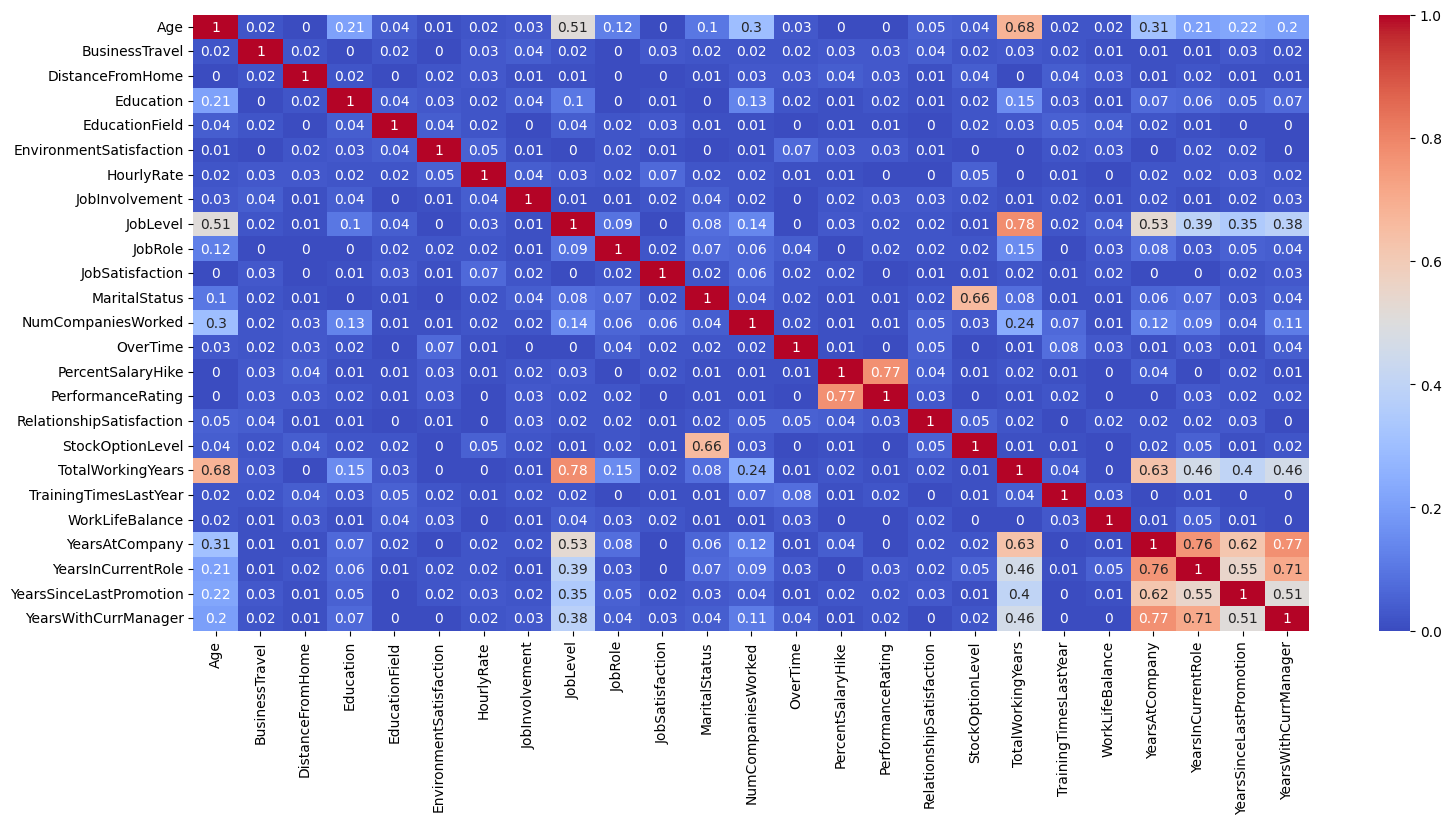

<Figure size 640x480 with 0 Axes>

'ord encode, highly correlated data: []'

In [ ]:
# Calculate correlation matrix of the encoded X data:

X_corr_matrix = X_df_encoded.corr().abs().round(2)

# Plot heatmaps
plt.figure(figsize=(18, 8))  # Adjust the width and height as needed
sns.heatmap(X_corr_matrix, annot=True, cmap='coolwarm')
f = plt.figure()
plt.show()

# Select upper triangle of correlation matrix
upper = X_corr_matrix.where(np.triu(np.ones(X_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'ord encode, highly correlated data: {high_corr}')

Could consider dropping 2 of the following,
*although > 90% is a more typical threshold to use.*
*   YearsAtCompany (4 over 60%)
*   TotalWorkingYears,   (3 over 60%)
*   YearsWithCurrentManager, (2 over 60%)
*   YearsInCurrentRole or (2 over 60%)

In [ ]:
# Create a list of at least 10 column names to use as X data
# Create X_df using your selected columns
# Keep X important features determined above:
X_df = X_df[X_feat_import_cols]

# Show the data types for X_df
display(X_df.head())
display(X_df.info())

# display(X_df.dtypes)

,JobRole,EducationField,JobLevel,Age,TotalWorkingYears,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,OverTime,NumCompaniesWorked,YearsWithCurrManager,TrainingTimesLastYear,YearsInCurrentRole,JobSatisfaction,YearsSinceLastPromotion,EnvironmentSatisfaction,WorkLifeBalance,RelationshipSatisfaction
0,Sales Executive,Life Sciences,2,41,8,94,1,6,11,Yes,8,5,0,4,4,0,2,1,1
1,Research Scientist,Life Sciences,2,49,10,61,8,10,23,No,1,7,3,7,2,1,3,3,4
2,Laboratory Technician,Other,1,37,7,92,2,0,15,Yes,6,0,3,0,3,0,4,3,2
3,Research Scientist,Life Sciences,1,33,8,56,3,8,11,Yes,1,0,3,7,3,3,4,3,3
4,Laboratory Technician,Medical,1,27,6,40,2,2,12,No,9,2,3,2,2,2,1,3,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   JobRole                   1470 non-null   object
 1   EducationField            1470 non-null   object
 2   JobLevel                  1470 non-null   int64 
 3   Age                       1470 non-null   int64 
 4   TotalWorkingYears         1470 non-null   int64 
 5   HourlyRate                1470 non-null   int64 
 6   DistanceFromHome          1470 non-null   int64 
 7   YearsAtCompany            1470 non-null   int64 
 8   PercentSalaryHike         1470 non-null   int64 
 9   OverTime                  1470 non-null   object
 10  NumCompaniesWorked        1470 non-null   int64 
 11  YearsWithCurrManager      1470 non-null   int64 
 12  TrainingTimesLastYear     1470 non-null   int64 
 13  YearsInCurrentRole        1470 non-null   int64 
 14  JobSatisfaction         

None

In [ ]:
# Break out y columns for Multi-Target Predictions
y_dept = y_df['Department']
y_attr = y_df['Attrition']
# display(y_dept.head())
# display(y_attr.head())

In [188]:
# Split the data into training and testing sets, including separate sets for y Department and y Attrition columns

# NOTE: It’s generally recommended to perform one-hot encoding after splitting your data into training and testing sets.
# This helps prevent data leakage, ensuring that information from the test set does not influence the training process.

from sklearn.model_selection import train_test_split
X_train, X_test, y_dept_train, y_dept_test, y_attr_train, y_attr_test = train_test_split(X_df, y_dept, y_attr, random_state=13)

In [189]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary

# One Hot Encoding using Pandas Get_Dummies preferred due to simplicity
# One-hot encode training set, columns = JobRole, EducationField, OverTime
X_train_encoded = pd.get_dummies(X_train, columns=['JobRole', 'EducationField', 'OverTime'], dtype=int)

# Ensure the test set has the same columns as the training set
X_test_encoded = pd.get_dummies(X_test, columns=['JobRole', 'EducationField', 'OverTime'], dtype=int)
# X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

display(X_train_encoded.head())
display(X_train_encoded.info())
display(X_test_encoded.head())
display(X_test_encoded.info())

,JobLevel,Age,TotalWorkingYears,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,YearsWithCurrManager,TrainingTimesLastYear,...,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,OverTime_No,OverTime_Yes
1159,2,39,10,81,4,9,13,0,8,2,...,0,0,0,0,0,1,0,0,1,0
695,3,37,17,46,1,14,11,5,7,2,...,1,0,0,1,0,0,0,0,1,0
1290,2,34,11,93,9,7,17,4,7,3,...,0,0,0,1,0,0,0,0,1,0
792,2,33,14,54,29,13,22,1,8,4,...,0,0,0,0,0,1,0,0,1,0
14,1,28,6,50,24,4,14,5,3,4,...,0,0,0,1,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 1159 to 338
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   JobLevel                           1102 non-null   int64
 1   Age                                1102 non-null   int64
 2   TotalWorkingYears                  1102 non-null   int64
 3   HourlyRate                         1102 non-null   int64
 4   DistanceFromHome                   1102 non-null   int64
 5   YearsAtCompany                     1102 non-null   int64
 6   PercentSalaryHike                  1102 non-null   int64
 7   NumCompaniesWorked                 1102 non-null   int64
 8   YearsWithCurrManager               1102 non-null   int64
 9   TrainingTimesLastYear              1102 non-null   int64
 10  YearsInCurrentRole                 1102 non-null   int64
 11  JobSatisfaction                    1102 non-null   int64
 12  YearsSinceLastPromotion

None

,JobLevel,Age,TotalWorkingYears,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,YearsWithCurrManager,TrainingTimesLastYear,...,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,OverTime_No,OverTime_Yes
634,2,25,5,98,3,5,18,1,3,3,...,1,0,0,0,0,0,1,0,0,1
194,4,45,22,65,2,20,23,9,8,1,...,0,0,0,0,0,1,0,0,1,0
1404,2,42,20,37,23,20,12,1,7,2,...,0,0,0,1,0,0,0,0,1,0
630,2,22,4,33,1,2,22,6,2,2,...,0,0,0,1,0,0,0,0,1,0
415,1,34,3,33,6,2,16,0,0,3,...,0,1,0,0,1,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 634 to 758
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   JobLevel                           368 non-null    int64
 1   Age                                368 non-null    int64
 2   TotalWorkingYears                  368 non-null    int64
 3   HourlyRate                         368 non-null    int64
 4   DistanceFromHome                   368 non-null    int64
 5   YearsAtCompany                     368 non-null    int64
 6   PercentSalaryHike                  368 non-null    int64
 7   NumCompaniesWorked                 368 non-null    int64
 8   YearsWithCurrManager               368 non-null    int64
 9   TrainingTimesLastYear              368 non-null    int64
 10  YearsInCurrentRole                 368 non-null    int64
 11  JobSatisfaction                    368 non-null    int64
 12  YearsSinceLastPromotion  

None

In [217]:
# ...decided to leave the above Pandas get_dummies for this purpuse

# Encoding using sklearn OneHotEncoder

# from sklearn.preprocessing import OneHotEncoder
# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

# # Fit and transform the training data
# X_train_encoded = encoder.fit_transform(X_train[['JobRole', 'EducationField', 'OverTime']])
# X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['JobRole', 'EducationField', 'OverTime']))
# X_train_final = pd.concat([X_train.reset_index(drop=True).drop(['JobRole', 'EducationField', 'OverTime'], axis=1), X_train_encoded_df], axis=1)

# # Transform the test data
# X_test_encoded = encoder.transform(X_test[['JobRole', 'EducationField', 'OverTime']])
# X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['JobRole', 'EducationField', 'OverTime']))
# X_test_final = pd.concat([X_test.reset_index(drop=True).drop(['JobRole', 'EducationField', 'OverTime'], axis=1), X_test_encoded_df], axis=1)

# # Display the encoded DataFrames
# display(X_train_final.head())
# display(X_test_final.head())

In [218]:
# Scale X_train_encoded, X_test_encoded Data

# Create a StandardScaler
scaler = StandardScaler()

# Fit/Train the StandardScaler to the training data
scaler.fit(X_train_encoded)

# Transform/Scale the encoded training and testing data
X_train_encoded_scaled = scaler.transform(X_train_encoded)
X_test_encoded_scaled = scaler.transform(X_test_encoded)

In [219]:
# Create a OneHotEncoder for the y Department/ Attrition Dataframes

# Fit the encoder to the training data
# Transform the training and testing data
# Create two new variables by applying encoder to the training and testing data

# Using Pandas get_dummies())

y_dept_train_encoded = pd.get_dummies(y_dept_train, dtype=int)
y_dept_test_encoded = pd.get_dummies(y_dept_test, dtype=int)

y_attr_train_encoded = pd.get_dummies(y_attr_train, dtype=int)
y_attr_test_encoded = pd.get_dummies(y_attr_test, dtype=int)

display(y_dept_train_encoded.head())
display(y_dept_train_encoded.info())

display(y_attr_train_encoded.head())
display(y_attr_train_encoded.info())

,Human Resources,Research & Development,Sales
1159,0,1,0
695,0,0,1
1290,0,1,0
792,0,1,0
14,0,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 1159 to 338
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Human Resources         1102 non-null   int64
 1   Research & Development  1102 non-null   int64
 2   Sales                   1102 non-null   int64
dtypes: int64(3)
memory usage: 34.4 KB


None

,No,Yes
1159,1,0
695,0,1
1290,0,1
792,0,1
14,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 1159 to 338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   No      1102 non-null   int64
 1   Yes     1102 non-null   int64
dtypes: int64(2)
memory usage: 25.8 KB


None

In [216]:
# ...decided to leave the above Pandas get_dummies for this purpuse

# Encoding using sklearn OneHotEncoder


# from sklearn.preprocessing import OneHotEncoder
# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)
# # Fit and transform the data:
# y_encoded =

# # Fit/Train the encoder to the training data
# encoder.fit(y_train[['Department']])

# # Applying the encoder to training and testing data
# y_train_ohe_dept = y_ohe_dept.transform(y_train[['Department']])
# y_test_ohe_dept = y_ohe_dept.transform(y_test[['Department']])

## Create, Compile, and Train the Model

X_train_encoded_scaled
X_test_encoded_scaled

y_dept_train_encoded
y_dept_test_encoded

y_attr_train_encoded
y_attr_test_encoded

In [ ]:
# Find the number of columns in the X training data
rows, columns = X_train_encoded_scaled.shape   # columns = X_train_encoded.shape[1]
print(f"rows: {rows} ; cols: {columns}")

# Create Shared layers of the model:
#  + Create the input layer
input_layer = layers.Input(shape=(columns,), name='input_features')

# Create at least two Shared hidden layers
shared_layer1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu')(shared_layer1)


rows: 1102 ; cols: 33


In [220]:
# Create a branch for Department: y_dept_train_encoded, y_dept_test_encoded

# Create the hidden layer, output layer
dept_hidden = layers.Dense(16, activation='relu')(shared_layer2)

# need to match shapes of target data and the output layer of your model
dept_output = layers.Dense(len(y_dept_train_encoded.columns), activation='softmax', name='dept_output')(dept_hidden)

In [221]:
# Create a branch for Attrition: y_attr_train_encoded, y_attr_test_encoded

# Create the hidden layer, output layer
attr_hidden = layers.Dense(16, activation='relu')(shared_layer2)

# need to match shapes of target data and the output layer of your model
attr_output = layers.Dense(len(y_attr_train_encoded.columns), activation='sigmoid', name='attr_output')(attr_hidden)

In [222]:
# Create the model
model = Model(inputs=input_layer, outputs=[dept_output, attr_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'dept_output': 'categorical_crossentropy', 'attr_output': 'binary_crossentropy'},  # sparse_categorical_crossentropy
              metrics={'dept_output': 'accuracy', 'attr_output': 'accuracy'})

# Display the model summary
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_features            │ (None, 33)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 64)             │          2,176 │ input_features[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 32)             │          2,080 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 16)             │            528 │ dense_31[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 16)             │            528 │ dense_31[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dept_output (Dense)       │ (None, 3)              │             51 │ dense_39[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attr_output (Dense)       │ (None, 2)              │             34 │ dense_40[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,397 (21.08 KB)

 Trainable params: 5,397 (21.08 KB)

 Non-trainable params: 0 (0.00 B)

In [225]:
# Fit/Train the model

# X_train_encoded_scaled
# y_dept_train_encoded
# y_attr_train_encoded

history = model.fit(X_train_encoded_scaled,
                {'dept_output': y_dept_train_encoded,
                 'attr_output': y_attr_train_encoded},
                validation_data=(X_test_encoded,
                 {'dept_output': y_dept_test_encoded,
                  'attr_output': y_attr_test_encoded}),
                  epochs=50, batch_size=32)

# You can either use validation_split or validation_data, but not both.
# validation_split=0.2)   #  20% is saved for Validation

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - attr_output_accuracy: 0.8506 - dept_output_accuracy: 0.6014 - loss: 1.6141 - val_attr_output_accuracy: 0.8424 - val_dept_output_accuracy: 0.5027 - val_loss: 3.9856
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - attr_output_accuracy: 0.8436 - dept_output_accuracy: 0.9329 - loss: 0.7440 - val_attr_output_accuracy: 0.8424 - val_dept_output_accuracy: 0.6902 - val_loss: 5.9215
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - attr_output_accuracy: 0.8423 - dept_output_accuracy: 0.9832 - loss: 0.5345 - val_attr_output_accuracy: 0.8424 - val_dept_output_accuracy: 0.7065 - val_loss: 7.8000
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - attr_output_accuracy: 0.8156 - dept_output_accuracy: 0.9919 - loss: 0.4656 - val_attr_output_accuracy: 0.8424 - val_dept_output_accuracy: 0.7092 - val_loss: 9.8601
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - attr_output_accuracy: 0.8583 - dept_output_accuracy: 0.9825 - loss: 0.3781 - val_at

In [234]:
# Evaluate the model with the testing data

# X_test_encoded_scaled
# dept_output, y_dept_test_encoded,
# attr_output, y_attr_test_encoded,
evaluation = model.evaluate(X_test_encoded_scaled,
                            {'dept_output': y_dept_test_encoded,
                             'attr_output': y_attr_test_encoded})
print(evaluation)

# Print the accuracy for both department and attrition
print(f"Total Loss: {evaluation[0]}")
print(f"Attrition Accuracy: {evaluation[1]}")
print(f"Department Accuracy: {evaluation[2]}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - attr_output_accuracy: 0.8130 - dept_output_accuracy: 0.9630 - loss: 1.5519 
[1.3614516258239746, 0.8152173757553101, 0.970108687877655]
Total Loss: 1.3614516258239746
Attrition Accuracy: 0.8152173757553101
Department Accuracy: 0.970108687877655


# Summary


Accuracy should be useful for mulit-class classification ('Department')  on this data

If the data is imbalanced, Accuracy can be misleading.  Best to use precision, recall, F1-score in these cases. For business applications, need to consider False Positives and False Negatives also.

AUC-ROC could also be used.

Activation functions best for these Neural layers:

For Hidden Layers: ReLU (Rectified Linear Unit) is used often with because it performs well and it helps mitigate the vanishing gradient problem.  Could also try Leaky ReLU or ELU (Exponential Linear Unit).

For output layers in Multi-Class classification ('Department'), softmax outputs a probability distribution over classes.
For output layers with Binary classification ('Attrition'), sigmoid is best.



This model could be improved with:
*   Hyperparameter Tuning: try different batch size, epoch number, neural network architecture values (# layers, # neurons/layer).
*   Data Enginnering: dimensionality reduction (PCA)
*   Cross-Validation: verify model performance is consistent across different slices of the data.
*   Cross-check with predictions from other Models to improve diversity of methods to try to improve overall accuracy.
*   Regularization: Dropout, L2 regularization, Batch Normalization to prevent overfitting.